In [1]:
%run Fonctions.ipynb

# BLAKE Colin, BERRY Julien, HOSPITAL Mayeul, BOUCHER lucie

# Table des matières

- [Travaux sur une fonction permettant de dessiner un PL](#cell2)
- [Travaux sur les changements de dimensions d'un PL](#cell3)
- [Travaux sur un générateur de PL](#cell1)
- [Travaux sur un générateur de L parfaits](#cellPerf)
- [Travaux sur les PL à plusieurs étages](#cellEtages)
- [Quantification des labyrinthes](#quant)

# Recherche

## Travail sur une fonction permettant de dessiner un PL
<a id="cell2"></a>

Soit $g$ un graphe représentant les chemins possibles, i.e. si depuis la case [$a$] on peut accéder à la case [$b$] alors les points a et b sont reliés dans ce dernier. Nous allons alors chercher à modéliser ce graphe sous la forme d'un labyrinthe tel qu'on le connait, c'est à dire avec des murs.

Soit $x$ l'abscisse d'une cellule et $y$ son ordonnée, le numéro de cette cellule dans le graphe $g$ est $(n * (y-1)) + x$ où $n$ est la longueur du $PL$.\
Cela suppose donc que tous les cellules allant de 1 à $(n * (m-1)) + n$ existent, où $m$ est la hauteur du $PL$, en effet si certaines cellules venaient à ne pas exister alors il y aurait des trous dans notre $PL$ ce qui poserait problème.

In [2]:
#Exemple de graphe dont on puisse changer les dimensions
g_exemple_dim1 = Graph({1:[4,3], 2:[3,5,4], 3:[6,4,5], 4:[5,6], 5:[], 6:[]})
#Exemple de graphe dont on ne puisse pas changer les dimensions, en effet pour hauteur = 3 les conditions ne sont pas respectées
g_exemple_dim2 = Graph({1:[2,4,3], 2:[5,4], 3:[6,4,5], 4:[6], 5:[6], 6:[]})

g_exemple2 = Graph({1:[2,5], 2:[3], 3:[], 4:[8], 5:[], 6:[10, 2], 7:[8], 8:[], 9:[], 10:[11], 11:[12], 12:[]})

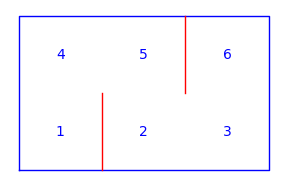

In [3]:
g = g_exemple_dim1
hauteur = 2

drawLab(hauteur, g)

#Note : Plutôt que de chercher à retrouver 'a' depuis le graphe, il suffit de reprendre les dimensions avec lesquelles il a été généré, ce qui vérifiera par la même occasion que deux cellules ne puissent pas être reliées de manière aberrante

On peut remarquer que si l'on considère qu'une cellule est accessible depuis une autre cellule qui n'est pas adjacente, alors elle n'est pas modélisée par la fonction. En effet, imaginons que la cellule n°1 soit liée à la cellule n°3, i.e. que la cellule n°3 soit accessible depuis la cellule n°1 sans étape intermédiaire, alors on serait dans un cas absurde à moins de réordonner l'agencement des cellules dans le labyrinthe.\
On considère ici que l'ordre des cellules est fixé, où la cellule 1 est en bas à gauche et la dernière cellule en haut à droite.

Pour reprendre le vocabulaire des graphes, s'il n'y a pas de mur entre deux cellules, c'est à dire s'il y a un chemin, c'est que dans le graphe du pseudolabyrinthe les deux sommets associés à la cellule sont reliés.

## Travaux sur les changements de dimensions d'un PL
<a id="cell3"></a>

Toute la partie suivante part de la manière dont nous avons décidé de dessiner les Labyrinthes, dans l'optique d'améliorer cette fonction et de s'assurer de sa validité, les résultats obtenus ne sont valides que si on représente les PL en les numérotant de la manière dont on l'a fait.\
Pour cela, nous supposerons des cas improbables, qui relieraient des cellules qui ne sont pas réellement adjacentes les uns des autres, afin de rendre la fonction fonctionnelle indépendemment du mode de génération du PL.\
Le but principal recherché est de savoir dans quelles conditions nous serons face à un PL qui soit représenté avec autant de murs, peu importe la dimension par laquelle nous le représenterons, afin de comprendre les subtilités de la façon dont on le dessine.

### Murs verticaux
<a id="cell3.1"></a>
   * On peut remarquer que la modélisation du $PL$ de hauteur $n$ où $n$ est le nombre de cellules de $g$, qui est donc représenté sous la forme $n*1$, est le symétrique du graphe de hauteur $1$.   
   * Soit $g_L$ un labyrinthe de taille $n*m$ et $A$ l'ensemble des points de $g_L$, alors un $PL$ de dimensions $n'*m'$ (on change donc les dimensions de représentation) tel que $A' = A$ peut être un labyrinthe si certaines conditions sont respectées (Expérimentations n°1)
   * Le nombre de murs n'est pas conservé lors du changement de dimensions, on conjecture que pour que ce soit le cas il faut que :\
       On considère ici que les coordonnées commencent à 1 et non 0,\
       $\forall n \neq 1$ la longueur du labyrinthe et $\forall m \neq 1$ sa hauteur :
       * chaque cellule de coordonnées $[n][i]$ avec $i \in [1, m-1]$, soit liée à la cellule de coordoonnées $[1][i+1]$, ces liaisons ne sont pas visibles pendant la modélisation mais le sont si l'on change les dimensions.\
       *Note : En fait on vérifie que deux cellules qui sont adjacentes dans une configuration mais qui ne le sont pas dans une autre, sont reliées, sinon le nombre de mur changera inévitablement.* 
       * chaque cellule de coordonnées $[i][j]$ avec $i+(n*(j-1)) \in [1, len(A) - m]$ soit liée à la cellule de coordonnées
           * $[i + m][j]$ si $\left\lfloor\dfrac{i}{n+1}\right\rfloor = \left\lfloor\dfrac{i+m}{n+1}\right\rfloor$
           * $[i + m - n][j+1]$ si $\left\lfloor\dfrac{i}{n+1}\right\rfloor + 1 = \left\lfloor\dfrac{i+m}{n+1}\right\rfloor$\
           Certaines liaisons ne seront visibles que dans certaines dimensions et seront sans effet dans d'autres. En réalité, on associe là des cellules qui pourraient être adjacentes dans une certaine configuration, afin de respecter le même nombre de murs.\
           
           On conjecture qu'un graphe respectant ces conditions conservera le même nombre de mur peu importe les dimensions de visualisation, cf. "g_exemple_dim1"\
           *La condition ci-dessus est en fait vérifiée quand on parcourt les différents $n$ possibles, mais il est plus facile de créer à la main un $PL$ alterable en vérifiant cette condition, d'où le fait de l'avoir laissée*
       

Supposons qu'un graphe soit représenté par des points qui s'appellent "0, 2, 6", la manière de dessiner ce PL sera biaisé (*Note: La version de drawLab() actuelle est la version finale, donc tout est désormais fonctionnel*).\
Il faut donc faire fi du nom des cellules pour pouvoir travailler de manière uniforme.
Pour cela je crée la fonction "deleteHoles(Graph)" qui permet de supprimer les trous et de ramener le Graph à une forme "1, 2, 3", de manière à exploiter les refléxions précédentes.

Description de la fonction :\
    - Elle prend en paramètre un Graphe que l'on considerera désordonné\
    - Elle renvoie un Graphe ordonné qui conserve les mêmes liaisons que le Graphe en paramètre\
    - Pour cela elle passe par un dictionnaire qui associe les cellules entre elles, et remplace l'étiquette d'une cellule par le premier nombre non utilisé

In [4]:
#Exemple d'utilisation de la fonction :
g_not_arranged = Graph({0:[2], 5:[6,3,2], 7:[9,10]})
n = 4

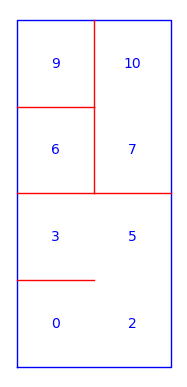

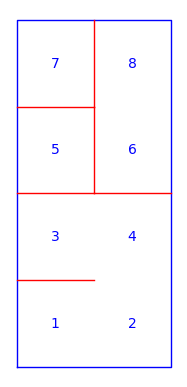

In [5]:
drawLab(n, g_not_arranged)
g_arranged = deleteHoles(g_not_arranged)
drawLab(n, g_arranged)

On considère maintenant une fonction "areDimensionsAlterable(Graph)" qui permet de savoir si un Graph aura le même nombre de murs peu importe ses dimensions, cette fonction a été modifiée de nombreuses fois au fil de la réflexion, pour devenir de plus en plus complète. Elle est intéressante pour voir l'implicite derrière notre modélisation du Graph, en effet deux Graphes qui peuvent sembler identiques si l'on décide de les représenter sous une forme arbitraire $a*b$ ne le seront pas dans une autre dimension $c*d$, elle permet notamment de mettre en lumière l'importance des liaisons "invisibles" dans notre représentation, lesquelles sont primordiales pour manipuler les changements de dimensions d'un PL !

Description de la fonction:\
    - Elle prend en paramètre un Graph\
    - Elle renvoie un Booléen\
    - Elle dit si, oui ou non, peu importe les dimensions le PL aura le même nombre de murs, non pas en construisant chaque Graph et en y comptant les murs mais en se basant sur des hypothèses mathématiques qui résultent d'une réflexion, en témoigne la vitesse d'exécution de cette dernière.

In [6]:
print(areDimensionsAlterable(g_exemple_dim1)) #True
print(areDimensionsAlterable(g_exemple_dim2)) #False
print(areDimensionsAlterable(g_exemple2)) #False

True
False
False


In [7]:
g_exemple_dim3 = Graph({1:[], 2:[], 3:[], 4:[2]})
#Si on rajoute une liaison entre 2 et 3 ses dimensions ne seront plus alterables puisqu'il n'y aurait que deux murs dans les dimensiosn 4*1 et 1*4, cependant on peut complètement rajouter ou enlever une liaison entre 1 et 2, ou entre 3 et 4, sans enlever sa propriété de conservation de murs, car ces deux binômes sont toujours adjacents

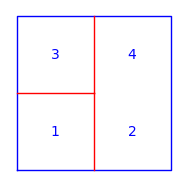

True


In [8]:
drawLab(2, g_exemple_dim3)
print(areDimensionsAlterable(g_exemple_dim3))

#Note : Ici on ne touche pas à la dimension horizontale

On a donc des labyrinthes qui sont très proches, ayant le même nombre de mur en apparence, qui n'ont pourtant pas les mêmes propriétés dans la représentation choisie de ces derniers.\
Si la conjoncture est respectée, on a bien le même nombre de murs.

On peut remarquer que :
* Entre la cellule de coordonnées $[1][1]$ et la cellule de coordonnées $[1][2]$ si $n > 1$, l'existence ou non d'une liaison ne modifie pas l'alterabilité d'un $PL$
* Entre la cellule de coordonnées $[m][n-1]$ et la cellule de coordonnées $[m][n]$ si $n > 1$, l'existence ou non d'une liaison ne modifie pas l'alterabilité d'un $PL$
* De manière plus générale, s'il n'existe pas de dimensions($g$) tel que $x_i$ et $x_{i+1}$ ne soient pas adjacentes où $x_i$ est le numéro de la cellule, alors l'existence ou non d'une liaison entre $x_i$ et $x_{i+1}$ ne modifie pas l'alterabilité d'un $PL$.
    * S'il existe une dimension ($g_1$) où $x_i$ et $x_{i+1}$ ne sont pas adjacents et une dimension ($g_2$) où il le sont, alors l'existence d'une liaison ou non modifie l'altérabilité du $PL$ 

On notera alors l'importance de savoir si une dimension est possible ou non pour un nombre de cellules donné, typiquement un $PL$ à 13 cellules ne pourra être représenté que sous la forme 13x1 et 1x13.\
Pour cela on crée la fonction "dimensions(Graph)" qui permet simplement de décomposer le nombre de cellules d'un graphe en toutes combinaisons de deux facteurs $a$ et $b$ tels que $a*b$ = Nombre de cellules
    
Description de la fonction :\
    - Elle prend en paramètre un Graphe\
    - Elle renvoie une liste de paires\
*Note: Un exemple d'utilisation de cette fonction est disponible plus loin, pour représenter un graphe sous toutes ses formes possibles*

Poussons un peu plus loin avec un graphe à 12 cellules :

True


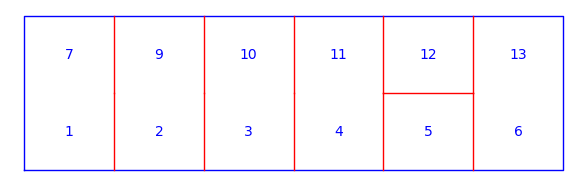

In [9]:
g_exemple_dimL = Graph({1 :[],
                        2 :[],
                        3 :[],
                        4 :[1],
                        5 :[1, 2],
                        6 :[3, 2, 13, 10, 9, 11],
                        7 :[4, 3, 1, 5],
                        13:[11],
                        9 :[5, 4, 2, 11],
                        10:[5, 3],
                        11:[4],
                        12:[10]}) #Note : Ce graphe a été modifié par la suite pour tester les conjonctures sur l'horizontalité des murs
#for (n, m) in dimensions(g_exemple_dimL): #Note: Pour éviter de remplir le notebook cette boucle est passée en commentaire
longueur = 2
print(areDimensionsAlterable(g_exemple_dimL))
drawLab(longueur, g_exemple_dimL)

### Murs horizontaux
<a id="cell3.2"></a>

Jusqu'alors on a considéré naïvement que l'on n'avait aucun mur horizontal (i.e. un mur entre deux cellules qui soient adjacentes l'une au dessus de l'autre) dans nos raisonnements.

On peut facilement montrer que si deux cellules $x$ et $y$ sont adjacentes verticalement pour un $n \in \mathbb{N}$ alors ce $n$ est unique :\
Supposons que deux cellules $x$ et $y$ soient adjacentes verticalement tel que $y > x$, on a alors $x = y - n \iff n = y - x$, il n'existe donc qu'un seul $n$ au maximum vérifiant cela. Il n'existe une configuration où deux cellules sont adjacentes verticalement si et seulement si $(n,$ len(g.adjacency_matrix()[0])$/n) \in$ dimensions($g$).

Supposons maintenant qu'il y ait un mur horizontal entre $x$ et $y$, alors toutes les autres dimensions possibles du $PL$ n'auront pas ce mur horizontal, puisque les deux cellules n'y seront pas adjacentes (sauf pour $n = 1$ où les cellules qui sont adjacentes verticalement peuvent l'être horizontalement dans les autres dimensions). Il faut alors compenser ce mur horizontal, on cherche alors deux cellules qui sont adjacentes dans toutes les dimensions sauf celle où $x$ et $y$ sont adjacentes.\
Soient les cellules $x'$ de coordonnées $[i][n]$ et $y'$ de coordonnées $[i+1][1]$ avec $i \in [1, m-1]$. On note $n_{x_1}$ le numéro d'une cellule $x_1$ avec $n \in [1, n*m]$, on a alors $n_{y'} = n_{x'} + 1$. Ces deux cellules sont donc adjacentes horizontalement $\forall n$ tel que $n_{x'} \not\equiv 0 \pmod n$\
$x'$ et $y'$ ne seront pas adjacentes horizontalement dans toutes les dimensions $n'$ telles que $n' = kn_{x'}$ où $k \in\mathbb{R}$.

Si l'on a un mur horizontal entre $x$ et $y$ dans une dimension $(n, m)$ alors il faut qu'un couple $x'$ et $y'$ tels que $n_{y'} = n_{x'} + 1$ soit lié **et** qu'ils ne soient pas adjacents dans la dimension $(n, m)$.\
On ne peut donc avoir que $(m - 1)$ murs horizontaux au maximum, puisque l'on n'a que $(m - 1)$ liaisons dites invisibles possibles, si on en a davantage on ne pourra pas les compenser

\---- Après réflexion cette partie est fausse mais nous avons décidé de la laisser en témoin de nos échecs ----\
Egalement, si $\forall (n,m) \in$ dimensions($g$) on a $(n*m-n)) - I_n$ murs horizontaux ou plus, où $I_n$ est le nombre de liaison entre deux cellules $x_n$ et $x_{n+1}$ tel que ces deux cellules ne soient pas adjacentes, on est dans une configuration où le labyrinthe pourra être alterable.\
\------------------------------------------------------------------------------------------------------------------------

On a donc montré que :
 - S'il y a moins de murs horizontaux que des couples ($a$, $b$) tels que $n_a = n_b+1$ qui ne soient pas liés,\
 Le PL peut être alterable.
 
On vérifie bien que s'il n'y a aucun mur horizontal, il doit y avoir $(m - 1)$ liaisons "invisible", ce qui correspond à notre résultat dans l'étude d'un $PL$ sans mur horizontal.\
On modifie alors la fonction areDimensionsAlterable($g$) pour prendre en compte la dimension horizontale, si cette fonction retourne "$true$" alors ce graphe aura le même nombre de murs dans toutes ses dimensions.

***Remarques :***
* Les $PL$ dans lesquels aucune cellule ne serait liée à une autre (d'après __2__) ou toutes les cellules seraient liées (d'après __1__), n'est altérable que s'il n'est représentable que sous la dimension $n*1$
* Si un $PL$ de dimension $1 * m$ est alterable et contient $(m - 1)*n$ murs, alors aucune cellule n'est liée à une autre qui puisse lui être adjacente. (*)
* Le $L$ vide de dimensions $n * 1$, i.e. le $L$ dans lequel toutes les cellules sont reliées, reste un $L$ parfait dans toutes ses dimensions si et seulement si $n$ est premier. (S'il ne peut être representé que sous ses dimensions $n * 1$ ou $1* m$)

(*) Pour vérifier que deux cellules $x_i$ et $x_j$ ne puissent pas être adjacentes peu importe les dimensions, il suffit que $\nexists n \in$ dimensions($g$) tel que $x_i \pm n = x_j$

In [10]:
#Je vous propose ici un mélange des différentes fonctions, pour montrer quel est l'intérêt de les utiliser ensemble

for i in range (10):
    M = pseudoLabGenerator(2,2)
    if areDimensionsAlterable(M):
        print(M.to_dictionary())

        #Ici nous travaillons avec des PL de taille 2x2 car la rareté des pseudolabyrinthes aux dimensions dites altérables augmente exponentiellement avec l'augmentation de la taille, par exemple pour un PL de taille 3x2 le taux de chance d'en obtenir un généré aléatoirement qui soit altérable est de moins de 0.001%, alors qu'il est de l'ordre de 47% pour un PL de taille 2x2 ce qui est plus pratique pour la démonstration.
        #Cet écart est dû à la façon dont sont générés les PL dans notre fonction pseudoLabGenerator(), en effet il n'est pas prévu que des liaisons "invisibles" apparaissent dans la génération, ce qui raréfie les résultats comparativement à un générateur qui le ferait, mais ce serait un générateur mal élaboré.

{0: [1, 2], 1: [0], 2: [0, 3], 3: [2]}
{0: [1], 1: [0], 2: [3], 3: [2]}
{0: [1], 1: [0], 2: [], 3: []}
{0: [2], 1: [3], 2: [0], 3: [1]}
{0: [1, 2], 1: [0], 2: [0, 3], 3: [2]}


In [11]:
#Choisissez le graphe de votre choix au dessus, ils sont tous considérés comme alterables par la fonction
mybeautifulgraph = {0: [1, 2], 1: [0], 2: [0, 3], 3: [2]}

[(1, 4), (2, 2), (4, 1)]
True


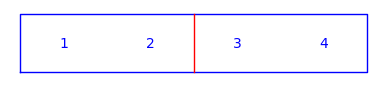

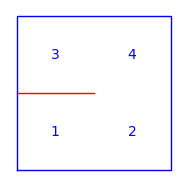

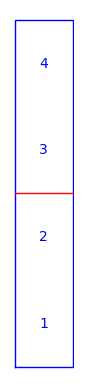

In [12]:
g_exemple_alt = Graph(mybeautifulgraph)

print(dimensions(g_exemple_alt)) #Il n'existe pas de n tel que 1 + n = 5 ou 6, ou tel que 2 + n = 6
print(areDimensionsAlterable(g_exemple_alt))
for (n, m) in dimensions(g_exemple_alt):
    drawLab(n, deleteHoles(g_exemple_alt))
    #On observera bien le même nombre de mur dans chacune des dimensions de votre graphe !

## Travaux sur un générateur de PL
<a id="cell1"></a>

Pour générer des pseudo-labyrinthes de manière aléatoire, nous nous sommes intéressés à la notion de matrices d'adjacences qui est une façon de représenter un graphes sous forme matricielle. \
Avec une matrice de taille $n*m$, on représente dans les cases la présence d'arêtes entre deux sommets par un 1 ou son absence par un 0.

En étudiant les matrices d'adjacences, il est important de noter qu'on peut s'intéresser uniquement au triangle supérieur de la matrice, celle-ci étant symétrique, on peut même exclure la diagonale puisqu'on ne va pas créer de boucles. \
Ainsi notre algorithme parcourt uniquement le triangle supérieur de la matrice en faisant commencer la seconde boucle for à la valeur de la première. Cela permet d'avoir des meilleurs performances et un algorythme plus simple. \
On parcourt donc la matrice carrée de taille $n*m$ et on rempli aléatoirement les cases avec des 1 ou des 0 puis on copie les cases dans le triangle inférieur par symmétrie.

Dans le cadre des pseudo-labyrinthes, il faut bien considérer le fait qu'un sommet donné ne peut être connecté qu'à un certain nombre de sommets qui lui sont adjacents dans un pavage carré. \
On doit donc ajouter des conditions au remplissage des cases pour que seulles les cases qui sont valides soient remplies aléatoirement. Pour cela on décide de remplir la matrice de telle sorte qu'un sommet pourra être relié uniquement à celui à sa droite ou à celui en dessous, on a donc deux étapes pour créer les arêtes d'un sommet donné :

* la case de droite: $M[j, j+1]$
* celle du dessous: $M[j, j+n]$

En procédant ainsi, on parcours l'ensemble des arêtes possibles pour les labyrinthes (voir animation), il faut néanmoins prendre en compte les cases situées dans la colonne de droite et la ligne du bas du pseudo-labyrinthes, les premières ne pouvant être reliées à celle à leur droite, les secondes à celles en dessous. \
Pour résoudre cette issue, on ajoute des conditions sur la positions du sommet dans le labyrinthe. Et on obtient donc un générateur de $PL$ de taille $n$ par $m$.

In [13]:
#changer les paramètres ici
n = 2
m = 2

[0 1 0 0]
[1 0 0 1]
[0 0 0 1]
[0 1 1 0]


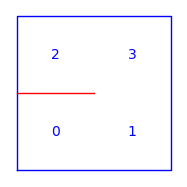

In [14]:
M = pseudoLabGenerator(n,m)
print(M.adjacency_matrix())
drawLab(n,M)

En générant un $PL$ de taille 2 par 2, on voit bien dans sa matrice d'adjacence que la diagonale est vide, évitant ainsi les boucles. \
On peut modifier les paramètres pour vérifier que ça reste toujours le cas.



### Notre générateur PL génère t-il les PL de manière homogène ?

Plusieurs algorithmes sont possibles pour générer des $PL$. \
L'algorithmie ne diffère pas sur le résultat obtenue qui reste un $PL$. Mais elle modifie la fréquence d'apparition des $PL$.
Nous avons donc codé la fonction modelisationSimul qui réalise et affiche diffèrentes statistiques sur notre générateur de $PL$. \
Sur un nombre donné de réalisation modelisationSimul :

- compte le nombre de murs de chaque $PL$
- traduie ces donnée en graphique (en rouge on peu observé l'ecart type).
- compte combien sont parfait (a l'aide d'un parcours en profondeur)
- compte combien ont autant de murs qu'un labyrinthe parfait

Pour tout réaliser modelisationSimul appelleplusieurs fonctions notament averageGenerator, isPerfect, isWay et numberOfWay

Nous avons visualiser les labyrinthes comme des graphes, des enssemble de sommets(ici les cases) et d'arêtes (ici les murs et passages). La bibliothèque SAGEMath possede de nombreuses fonctionnalités sur les graphes. On peut notament obtenir la matrice d'adjacence des graphes.
A partir de cette matrice nous avons pu dans un premier temps créer la fonction booléenne "isWay" qui determine si entre deux cases données dans un labyrinthe donné il y a un chemin ou non. \
On a definie un labyrinthe parfait comme un pseudo-labyrinthe dont l’enceinte délimite un espace connexe, et tel que l’ajout d’un mur lui fasse perdre sa connexité. \
La fonction "isPerfect" parcours le graphe de tel sorte a vérifié la connexité de ce graphe. Puis ajoute un à un un mur s'il n'y en a pas, verifie que le graphe n'es plus connexe, puis retire le mur ajouté.\
Si le graphe répond à tous ces critères on peut affirmer que c'est un labyrinthe parfait.

In [15]:
n = int(2) #Nous convertissons ici en int() car certaines méthodes ne fonctionnent pas avec les entiers de Sage
m = int(2)
repetitions = 100

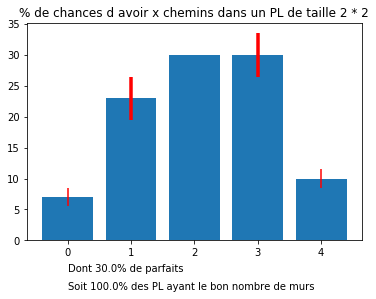

In [16]:
modelisationSimul(n, m, repetitions)

__Quelques explications au niveau de la modélisation du résultat :__\
Nous avions au préalable réalisé la fonction averageGenerator() qui nous donnait, pour une taille donnée et un nombre de répétitions demandé, combien de fois elle avait trouvé un PL à "x" chemins, c'est à dire qu'elle renvoyait un tableau T tel que soit contenu le nombre de PL qu'elle a simulé ayant 0 chemins soit associé à la valeur 0 dans une case du tableau.\
*Exemple de tableau retourné : [[17.0, 11], [15.0, 12], [14.0, 13], [11.0, 10], [10.0, 14], [8.0, 9], [8.0, 8], [6.0, 16], [5.0, 7], [3.0, 15], [2.0, 17], [1.0, 18]])*\
Cependant, il est difficile de pouvoir observer les données ainsi, parce qu'il faudrait compter les cases une à une et que l'évolution des valeurs ne sauterait pas spécialement aux yeux.\
C'est pourquoi nous avons décidé de réaliser un graphe, à l'aide de Matplotlib, cependant il est rapidement arrivé quelques coquilles :
- Lorsque l'on génère des PL de taille importante, un nombre de fois limité, il peut arriver que l'on trouve un exemplaire de PL à $n$ murs, mais aucun à $n-1$ murs, ce qui fait qu'il n'existe pas de case du tableau T dans laquelle apparaisse la valeur $n-1$, et forcément le graphique ne se réalisait pas en l'état
    - Pour cela nous avons donc initialisé toutes les cases à zéro chemins. Toutes ? Oui mais lesquelles ? Et bien c'était justement l'occasion de vérifier qu'un PL avant bien au maximum $(m*(2*n-1)-n+1)$ murs, résultat que nous avions trouvé au cours de nos recherches. A partir de là nous remplacons les cases pour lesquelles nous avons des valeurs, de ce fait nous avons au final le même tableau mais avec des "zéros" pour ne pas avoir de trous, le graphique se réalisait alors bel et bien.
- La probabilité d'avoir 1 ou 2 chemins dans un PL de taille 100x100 est très très faible, donc dans la grande majorité des cas il n'y aura aucun chemin à cet endroit, mais puisque nous avons initialisé toutes les cases à zéro, celle-là fait partie du graphique... Et les données étaient alors difficillement observable dans le détail. 
    - Pour y pallier, après avoir rempli toutes les cases avec nos valeurs, nous retirons toutes celles qui sont avant la première valeur différente de zéro (Si le nombre minimal de chemins rencontré est de 6, on supprime 1, 2, 3, 4, 5) et toutes les valeurs qui sont après la dernière valeur différente de zéro. Cela permet donc de faire disparaître les valeurs non pertinentes et d'avoir une meilleur vision du graphique.
 
Au final, avec ces deux modifications, nous avions un graphe qui n'avait pas de trou, mais qui restait lisible pour autant, exactement ce que nous cherchions.

Cependant, nous pouvions obtenir d'autres résultats, nous nous sommes alors interessé à la fiabilité des résultats obtenus, le PL que nous avons modélisé plus haut n'est pas vraiment équilibré, on peut se questionner sur sa validité. En fait, moins on fait de répétitions, moins les résultats seront fiables, ce qui semble assez logique, mais comment visualiser cette marge d'erreur rapidement ?\

La bibliothèque matplotlib permet de modéliser des barres d'erreur, qui correspondent à cette incertitude, nous en avons donc ajouté mais selon des critères qu'il a fallu définir.\
En premier lieu, nous nous sommes concentré sur l'aspect graphique, puisque la taille du graphique dépendait des paramètres entrés il fallait que la taille des marges d'erreur suive ces modifications, pour cela plutôt que de définir par rapport à des valeurs fixes nous avons pris des valeurs adapatatives (Un peu comme des vw en équivalent CSS), ce qui fonctionne assez bien.
En second temps, nous avons mené différentes expériences, et nous avons remarqué que sur un nombre de modélisation importante que le nombre de chemins suivait une loi normale, par exemple sur un nombre de 10000 répétitions en taille 4x4 on obtient :\
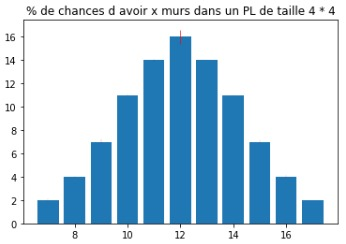\
*Note: Si l'image ne charge pas utilisez le lien suivant : https://imgur.com/9gpg3Fq, il arrive que CoCalc oublie les images integrées*\
On observe que le graphique s'équilibre très bien, et qu'il est vraiment rare d'obtenir moins de 7 chemins ou plus de 17, pour estimer alors la précision nous comparons donc le résultat obtenu à la représentation de la loi normale que l'on serait censé obtenir, ce qui permet rapidement de voir si le graphique est proche de ce qu'il est censé être ou non.\
On observe bien que plus le nombre de répétition augmente, plus on s'en approche.

Une deuxième information qui pourrait être utile serait de voir parmi ces PL que l'on a generé combien sont parfaits, pour cela on rajoute un compteur dans la fonction averageGenerator() qui vérifie grace à la fonction isPerfect(), de cette manière nous n'avons pas besoin de faire deux fois la simulation, d'une pierre deux coups.\
Tant qu'à faire, puisque nous avons étudié le nombre exact de murs que devait avoir un PL pour prétendre au titre de labyrinthe parfait, nous comparons le nombre de L parfait que nous avons obtenu par rapport au nombre de PL au bon nombre de mur, ce qui nous donne le % de PL qui ont le bon nombre de mur mais qui ne sont pas parfaits pour autant, ce qui est une donnée qui peut se révéler intéressante.\

Nous ajoutons un titre, et notre modélisation est terminée et prête à toute épreuve.

## Travaux sur un générateur de L parfaits
<a id="cellPerf"></a>

Pour les labyrinthes, il existe une manière simple d'en générer. Dans la théorie des graphes, il existe une notion équivalente aux labyrinthes, les arbres couvrants. \
De plus, Sage possède une librairie dédiée aux graphes avec une fonction qui permet de générer un arbre couvrant de taille $n*m$ aléatoirement.

Et comme nos professeurs d'informatique nous le répètent à chaque fois : "Il ne faut pas s'embêter à coder quelque chose que quelqu'un à déjà fait mieux que vous ne pourrez le faire", nous avons donc décider d'utiliser cette fonctionnalité combinée aux dictionnaires pour pouvoir créer nos labyrinthes. \
Nous utilisons des dictionnaires pour la mise en forme de l'arbre et le rentrer dans les dimensions demandées ainsi que les contraintes que nous avons au niveau des arêtes possibles.

In [17]:
#changer les paramètres ici
a = 5
b = 5

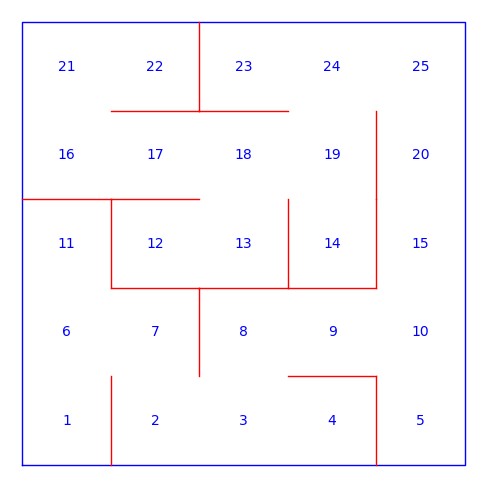

In [18]:
G = labGenerator(a, b)
drawLab(a, G)

On peut voir en regardant ce labyrinthe que les conditions sont bien respectées
- On peut toujours relier une case a à une case b par un unique chemin
- Si on ajoute un mur, la condition précédente n'est plus respectée

**En quoi est-ce similaire aux arbres couvrants ?**
Pour rappel, le graphe d'un L possède comme caractéristiques intéressantes dans ce contexte le fait de ne pas présenter de cycles, et celui de ne comporter qu'une seule composante connexe, c'est à dire qu'un chemin existe entre tous les sommets. Un arbre étant, par définition, un graphe non orienté, non vide, acyclique et connexe, on voit la similitude avec les caractéristiques recherchées. Cependant, on remarque que chaque composante connexe d'un PL constitue un arbre si elle n'est pas cyclique, puisqu'elle peut constituer un sous-graphe connexe, acyclique, non vide et non orienté, mais que le graphe représentant le PL peut ne pas être connexe (si c'est le cas, c'est donc un L). Le fait d'avoir un arbre n'est donc pas suffisant pour que le PL soit un L, il faut donc rajouter une condition : l'arbre doit contenir tous les sommets et toutes les arêtes du graphe, ce qui correspond à la définition d'un arbre couvrant.
On a donc une similitude entre les caractéristiques des arbres couvrants, et celle des L. Nous allons donc pouvoir nous servir de ces arbres couvrants (notamment grâce aux fonctions manipulant les "spanning trees" de Sage) pour étudier les labyrinthes

## Travaux sur les PL à plusieurs étages
<a id="cellEtages"></a>

* Si l'un des $PL$ formant le $PL$ à plusieurs étages possède un cycle, alors il est impossible d'obtenir un $L$ parfait en empilant plusieurs étages, on ne considerera alors que des $PL$ qui sont imparfaits non pas parce qu'ils possèdent un cycle mais parce qu'ils possèdent plusieurs composantes connexes.

**Soit $z$ l'ensemble des labyrinthes imparfaits ne possédant pas de cycles,**
* **Conjecture 1** : Si l'on considère un empilement de deux $L$ parfaits on obtiendra alors un $L$ parfait à deux étages si et seulement si on ne considère qu'un seul passage entre les deux étages.

Notons :\
    - $x, y$ les coordonnées horizontales de la cellule $C_n$\
    - $z_i$ la coordonnée de l'étage $i$.\
Supposons que les étages $z_i$ et $z_{i+1}$ soient des $L$ parfait, alors il existe un unique chemin entre chaque cellule $C_{n, z_i}$ et un unique chemin entre chaque cellule $C_{n, z_{i+1}}$.\
Soit $s$ le chemin entre deux cellules $C_{\alpha, z_i}$ et $C_{\beta, z_i}$ ne passant que par un seul étage, l'existence de $s$ est garantie par la perfection du labyrinthe $z_i$.\
Supposons maintenant qu'il y ait plus d'un passage entre les étages $z_i$ et $z_{i+1}$, il est alors évident que l'on puisse partir de $C_{\alpha, z_i}$, monter à l'un des passages puis redescendre à un autre passage et revenir à $C_{\beta, z_i}$, on note $s'$ ce chemin.\
On a alors $s \neq s'$ tandis que $s$ et $s'$ sont deux chemins de $C_{\alpha, z_i}$ vers $C_{\beta, z_i}$.\
Le labyrinthe à deux étages n'est donc forcément plus parfait.

* De manière plus générale, soit $\delta _{max}$ le nombre maximal de composantes connexes des deux $PL$ et $z_n$ le $PL$ des deux ayant $\delta _{max}$ composantes connexes, on peut obtenir un $L$ parfait seulement si on a $\delta _{max}$ passages entre les deux étages et que chaque passage soit dans une composantes connexe différente de $z_n$ _**(Condition 1)**_.

* **Conjecture 2** : Si l'un des deux étages est un $L$ parfait et qu'il y a un seul passage dans chaque composante connexe de l'autre $PL$, alors on obtient un $L$ parfait à deux étages, ce qui étend notre conjoncture précédente.

* **Conjecture 3** : On ne peut obtenir un $L$ parfait que si, en ouvrant tous les passages d'un étage à l'autre, on n'obtiendrait qu'une seule composante connexe, il faut bien choisir les $PL$ que l'on associe _**(Condition 2)**_.

Supposons que l'en ouvrant tous les passages on obtienne plus d'une composante connexe, alors il n'est pas possible de générer une configuration où il existe un chemin entre $C_k$ et $C_{k'}$ tel que $C_k$ et $C_{k'}$ soient deux cellules appartenant à deux composantes connexes différentes du $PL$ à deux étages ouvert.


**Pour générer un $L$ parfait à deux étages il faut respecter les conditions $1$ et $2$, par récurrence on peut alors construire un $L$ à $l$ étages.**

*Note : On n'a pour l'instant réflechi que sur le cas à deux étages mais s'il n'existe qu'un seul chemin entre deux cellules de deux étages différentd adjacents il est alors trivial d'itérer le même processus avec l'étage suivant*

Commençons par construire un générateur de pseudo labyrinthe en 3D, c'est en réalité assez simple il suffit d'ajouter une coordonnée à notre matrice d'adjacence, si l'on souhaite réaliser un PL à deux étages la matrice d'adjacence comportera simplement 2 fois plus de sommets qu'un PL à 1 étage. 

In [19]:
n = 3
m = 3
h = 3

In [20]:
G = pseudoLabGenerator3D(n,m,h)
G.plot3d(iterations=500, edge_size=0.01,vertex_size=0.04)

Graphics3d Object

Maintenant que nous pouvons générer des graphes en 3D, il s'agit de les modéliser.\
Pour cela, il existe dans SageMath la méthode GridGraph qui permet de représenter un graphe sous la forme d'un pavé droit où les sommets seraient reliés, idéal pour modéliser des passages. Lorsque l'on appelle la méthode GridGraph on obtient en fait le graphe d'un PL à plusieurs étages qui n'aurait aucun mur, on peut partir de là pour y ajouter des murs, c'est à dire y enlever des arêtes.

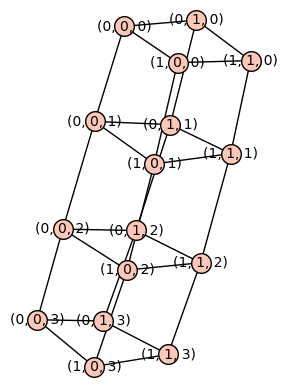

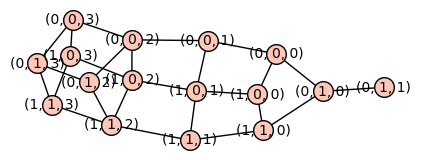

In [21]:
#Tentative de retrait d'une arête

G = graphs.GridGraph([2, 2, 4]) 

G.show()


G_pos = G.get_pos()
dict_G = G.to_dictionary()
dict_G[(0, 1, 1)] = [(0, 1, 0)]
dict_G[(0, 0, 1)] = [(0, 0, 0), (1, 0, 1), (0, 0, 2)]
dict_G[(0, 1, 2)] = [(0, 0, 2), (0, 1, 3), (1, 1, 2)]
dict_G[(1, 1, 1)] = [(1, 0, 1), (1, 1, 0), (1, 1, 2)]
G = Graph(dict_G)
G.set_pos(G_pos)
G.show()

On voit bien qu'il y a un problème, lorsque l'on enlève une arête la structure du GridGraph ne reste pas, essayons alors autrement...

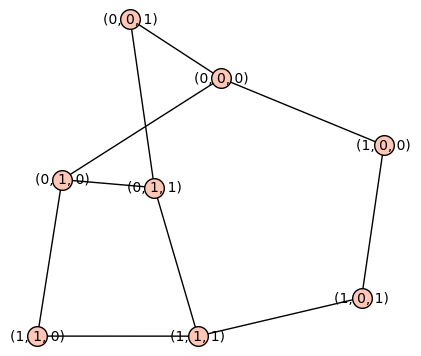

In [22]:
G = graphs.GridGraph([2, 2, 2])
positions_G = G.get_pos()
G.delete_edges([((1, 0, 0), (1, 1, 0)), ((1, 0, 1), (0, 0, 1))])
G.show(pos = positions_G)

Ici encore, la modélisation ne fonctionne pas comme on aurait pu l'espérer, il faudrait alors soit :
- Perséverer jusqu'à trouver une méthode de représenter avec le GridGraph, où nous n'avons pas trouvé de solution.
- Créer une fonction drawLab3D qui représenterait le PL indépendamment de la forme du graphe de ce PL, pour pallier aux problèmes de GridGraph, mais cela nécessite de la manipulation d'objets en 3D, nous avons essayé avec les mplot3d mais n'y sommes pas parvenu.
- Décider de ne pas représenter le PL et d'étudier ses propriétés en 3D, c'est finalement ce que l'on aurait dû décider mais puisque nous pensions devoir rendre un projet sous forme de présentation orale, il nous semblait un peu bancal de présenter des résultats mathématiques sans n'avoir aucun schéma à montrer, donc nous pensions devoir d'abord arriver à les représenter pour ne pas perdre nos auditeurs. Au final, nous avons décidé d'étudier d'autres propriétés et d'oublier la partie sur les labyrinthes à plusieurs étages, en attente d'une solution, que nous n'avons pas trouvé...
>Concernant la génération de L en trois dimensions, une idée de fonction rendue par l'algorithme visé a été de pouvoir (si cela était possible) créer un L en trois dimensions à partir des différents étages, sous forme de plusieurs PL à deux dimensions. Pour ce faire, la méthode la plus probante parmis celles explorées est celle de la construction "naïve" du L, c'est à dire en liant une à une les composantes connexes. On utilise pour cela la fonction "compteMaxCC", qui, à partir d'une liste de graphs, qui sont les différents étages du futur L en trois dimensions, extrait le graph comportant le plus de composantes connexes, afin de s'en servir comme "base" pour y lier les autres composantes connexes des autres graphs. L'objectif était ensuite d'ajouter une à une les liaisons entre les étages, en renouvelant les appels à "compteMaxCC", jusqu'à ce qu'il ne reste plus qu'une seule composante connexe, et que l'on ait donc un L en trois dimensions. Cette méthode présente cependant de gros inconvénients, tels que, par exemple, l'aspect très limité de la recherche de chemins à ajouter, son poids en terme de tests, et la difficulté de traiter les cas dans lesquels la construction est impossible.

## Quantification des labyrinthes
<a id="quant"></a>

On s'intéresse ici au nombre de labyrinthes de chaque taille, pour cela, on a crée une fonction *allLabGenerator(n,m)* qui génère l'ensemble des labyrinthes d'une taille donnée. \
On connait le nombre de $PL$ d'une certaines taille avec un nombre de murs précis et on sait que tous les labyrinthes on le même nombre de murs pour une taille donnée.

On génère donc aléatoirement des $PL$ et on compte le nombre de passages (endroits sans mur) avec notre fonction *numberOfWay(M)*, si le $PL$ à le bon nombre de murs, on l'ajoute à une liste et on recommence jusqu'à obtenir l'ensemble des $PL$ de taille $n*m$ avec $n*m-1$ passages. \
Une fois cette liste obtenue, on la parcourt et on en extrait les $PL$ qui sont des labyrinthes avec la fonction *isPerfect()*. On obtient donc une liste des $L$ de taille $n*m$.

In [23]:
#changer les paramètres ici
n = 2
m = 3

Nombre de labyrinthes :
15


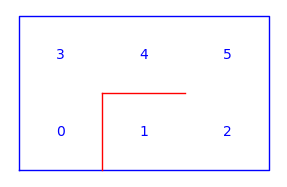

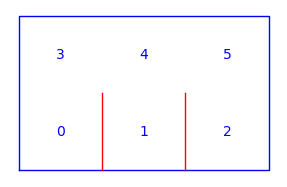

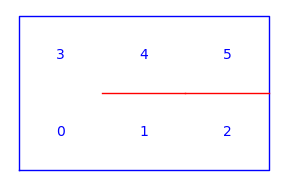

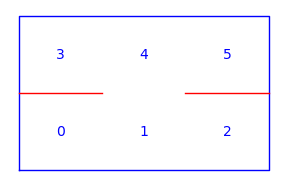

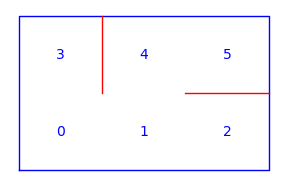

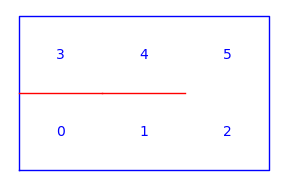

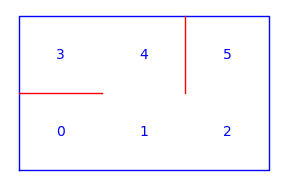

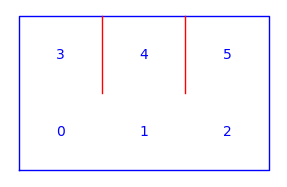

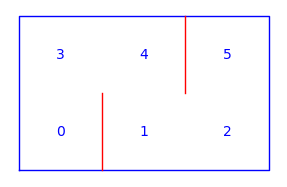

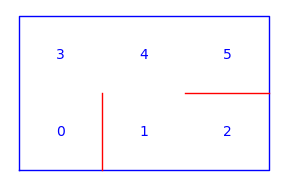

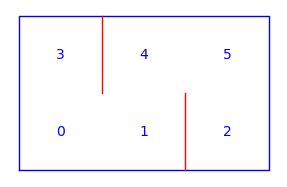

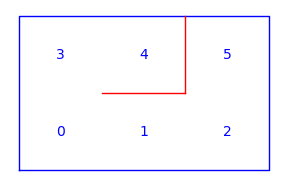

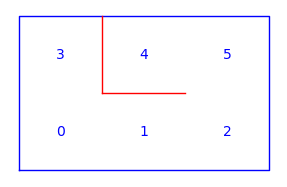

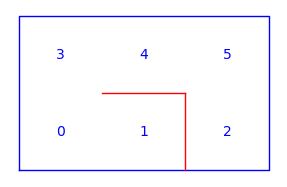

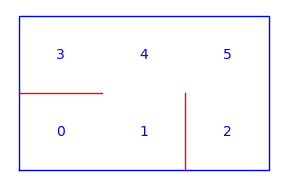

In [24]:
L = allLabGenerator(n, m)
print("Nombre de labyrinthes :")
print(len(L))

for i in L:
    drawLab(n,i)

En générant l'ensembles des labyrinthes de taille 2 par 3, on obtient bien 15 $L$ tous différents. Vous pouvez changer les paramètres de la fonction pour voir des changements dans les résultats.

On s'intéresse désormais à la généralisation de ce processus de quantification des labyrinthes.

La fonction *tableNbLab(k)* va utiliser *allLabGenerator(n,m)* pour trouver le nombre de labyrinthes de tailles $n*m$ jusqu'aux labyrinthes de taille $k*k$ et elle nous donne un tableau contenant le nombre de $L$ de chaque taille. Le nombre de labyrinthes grandit exponentiellement avec les tailles de celui-ci, on peut le voir en traçant la table pour $k=3$, en passant de $2*3$ à $3*3$ on a rajouter uniquement trois cellules et le nombre de labyrinthes a été multiplié par plus de 17 fois.

En recherchant une suite de nombre connue à partir du nombre de labyrinthes de taille $n*n$, on trouve que le nombre de labyrinthes de taille $4*4$ est de 100352 et plus de 500 millions pour une taille de 5 par 5. \
Il relève donc de l'impossible de générer l'ensemble des labyrinthes de taille $4*4$ avec notre fonction qui est basée sur l'aléatoire.

In [25]:
t = tableNbLab(3)
t

0  1   2    3
0  0  0   0    0
1  0  1   1    1
2  0  1   4   15
3  0  1  15  192

# Répertoire des fonctions :

Soient :\
$g$ un graphe des chemins possibles\
$A_g$ le nombre de cellules d'un graphe $g$\
$l$ la largeur d'un $PL$ en 3D\
$m$ la hauteur d'un $PL$\
$M$ la matrice d'adjacence d'un graphe\
$n$ la longueur d'un $PL$\
$x$ un entier arbitraire

* allLabGenerator ($n$,$m$) : Renvoie un tableau qui contient l'ensemble des labyrinthes de tailles $n$ par $m$
* areDimensionsAlterable ($g$) : Vérifie qu'un graphe $g$ puisse être changé de dimension sans alterer ses propriétés
* averageGenerator($n$, $m$, $x$) : Calcule la probabilité d'avoir un $PL$ à $i$ murs $\forall i, 0 \leq i \leq n*m$, la moyenne est effectuée sur $x$ répétitions
* deleteHoles($g$) : Modifie les numeros des cellules de $g$ pour que $g$ n'ait que des cellules allant de $1$ à $A_g$
* dimensions ($g$) : Donne les différentes dimensions possible d'un graphe
* drawLab ($n$, $g$) : Modélise un labyrinthe de taille $n*(A_g/n)$ à partir de son graphe des chemins possibles
* labGenerator ($n$, $m$) : Génère un $L$ de taille $n*m$
* modelisationSimul($n$, $m$, $x$) : Permet de modéliser les probabilités calculées par averageGenerator()
* numberOfWay($M$) : Calcule le nombre de '1' dans la partie supérieure de $M$
* pseudoLabGenerator ($n$, $m$) : Génère un $PL$ de taille $n*m$
* pseudoLabGenerator3D ($n$, $m$, $l$) : Génère un $PL$ en 3 dimensions de taille $n*m*l$
* tableNbLab($m$) : renvoie un tableau contenant le nombre de labyrinthes pour chaque tailles de $1*1$ à $m*m$, (m <= 3)
* compteMaxCC($listGraphs$) : renvoie une liste contenant le nombre maximum de composantes connexes de $listGraphs$, le graphe les contenant, et les composantes connexes en question